 **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTING DATASET**

In [2]:
ds=pd.read_excel(r"Crude Oil Prices Daily.xlsx")

In [3]:
ds.shape

(8223, 2)

In [4]:
ds.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [5]:
ds.head

<bound method NDFrame.head of            Date  Closing Value
0    1986-01-02          25.56
1    1986-01-03          26.00
2    1986-01-06          26.53
3    1986-01-07          25.85
4    1986-01-08          25.87
...         ...            ...
8218 2018-07-03          74.19
8219 2018-07-04            NaN
8220 2018-07-05          73.05
8221 2018-07-06          73.78
8222 2018-07-09          73.93

[8223 rows x 2 columns]>

**HANDLING_MISSING_VALUES**

In [6]:
ds.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [7]:
hd=ds.dropna()
print(hd)

           Date  Closing Value
0    1986-01-02          25.56
1    1986-01-03          26.00
2    1986-01-06          26.53
3    1986-01-07          25.85
4    1986-01-08          25.87
...         ...            ...
8217 2018-07-02          73.89
8218 2018-07-03          74.19
8220 2018-07-05          73.05
8221 2018-07-06          73.78
8222 2018-07-09          73.93

[8216 rows x 2 columns]


In [8]:
hd.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [9]:
hd.dropna(axis=0,inplace=True)
hd.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Date             0
Closing Value    0
dtype: int64

In [10]:
data_oil = ds.reset_index()['Closing Value']
data_oil


0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8218    74.19
8219      NaN
8220    73.05
8221    73.78
8222    73.93
Name: Closing Value, Length: 8223, dtype: float64

**FEATURES_SCALING**

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) 
data_oil=scaler.fit_transform(plt.np.array(data_oil).reshape(-1,1)) 


In [12]:
from sklearn import preprocessing


In [13]:
prepro = hd.iloc[:, 1:2].values
print ("\nOriginal data values : \n",  prepro)


Original data values : 
 [[25.56]
 [26.  ]
 [26.53]
 ...
 [73.05]
 [73.78]
 [73.93]]


In [14]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(prepro)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.60550861]
 [-0.59065128]
 [-0.57275494]
 ...
 [ 0.99807057]
 [ 1.02272024]
 [ 1.02778524]]


In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(prepro)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


**DATA_VISUALIZATION**

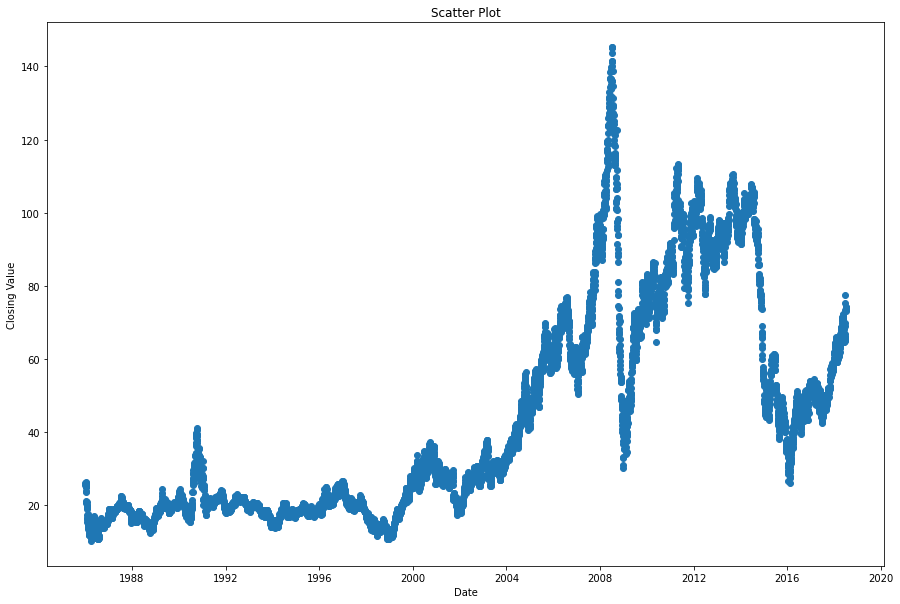

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(ds['Date'], ds['Closing Value'])
 
plt.title("Scatter Plot")
 

plt.xlabel('Date')
plt.ylabel('Closing Value')

plt.show()

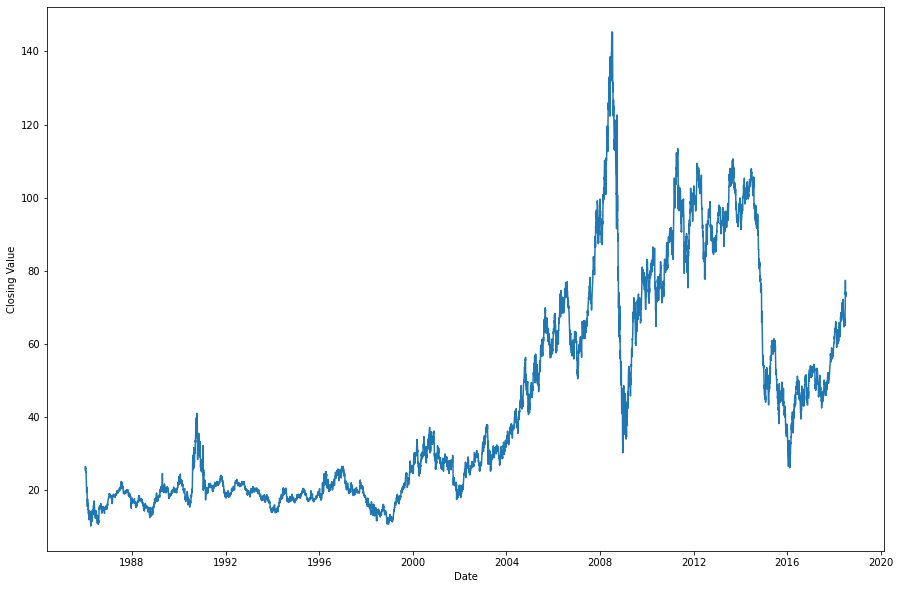

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y='Closing Value', data=ds)
plt.show()


(array([   0,    1,    2, ..., 8220, 8221, 8222]),
 <a list of 8223 Text major ticklabel objects>)

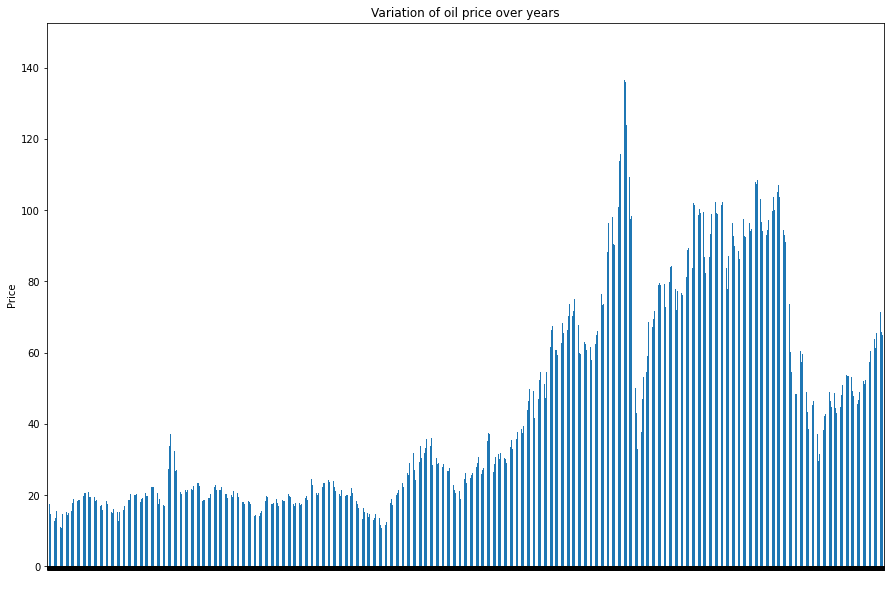

In [19]:
plt.figure(figsize=(15,10))
ds['Closing Value'].plot(kind='bar')
plt.title('Variation of oil price over years')
plt.ylabel('Price')
plt.xticks(color = 'w',rotation=90)

**SPLITTING_DATA_INTO_TRAINING_DATA_AND_TESTING_DATA**


In [24]:
hd['TV1'] = hd['Closing Value'].shift(1).rolling(window=3).mean()
hd['TV2']= hd['Closing Value'].shift(1).rolling(window=9).mean()
hd = hd.dropna()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
x = hd[['TV1','TV2']]
x.head

<bound method NDFrame.head of             TV1        TV2
18    20.083333  21.692222
19    19.923333  21.055556
20    19.976667  20.570000
21    19.546667  20.120000
22    19.380000  19.855556
...         ...        ...
8217  74.996667  70.648889
8218  73.823333  71.626667
8220  74.070000  72.545556
8221  73.710000  73.364444
8222  73.673333  73.893333

[8198 rows x 2 columns]>

In [26]:
y = hd['Closing Value']
y.head()

18    19.45
19    19.61
20    19.58
21    18.95
22    17.42
Name: Closing Value, dtype: float64

In [27]:
t = int(len(hd)*0.8)


x_train = x[:t]
y_train = y[:t]


x_test = x[t:]
y_test = y[t:]

In [28]:
print(x_test,y_test)

            TV1        TV2
6576  99.180000  99.448889
6577  99.276667  99.530000
6578  99.486667  99.616667
6579  99.326667  99.400000
6580  98.893333  99.161111
...         ...        ...
8217  74.996667  70.648889
8218  73.823333  71.626667
8220  74.070000  72.545556
8221  73.710000  73.364444
8222  73.673333  73.893333

[1640 rows x 2 columns] 6576    99.76
6577    99.47
6578    98.75
6579    98.46
6580    97.63
        ...  
8217    73.89
8218    74.19
8220    73.05
8221    73.78
8222    73.93
Name: Closing Value, Length: 1640, dtype: float64


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [30]:
predicted_price = model.predict(x_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Closing Value'])

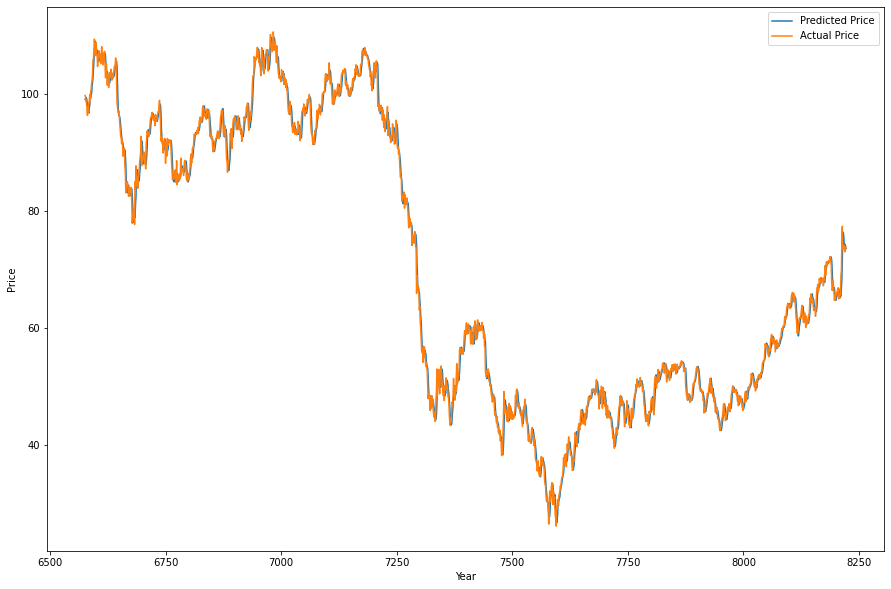

In [31]:
predicted_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()